<a href="https://colab.research.google.com/github/Aggie2024/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
- Author: Agnes Nansubuga

## Project Overview


 This project is for sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

## Load and Inspect Data

In [1]:
# Importing required packages
import pandas as pd
import numpy as np
# data from https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/


In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Save the filepath as a variable "fpath"
fpath = "/content/drive/MyDrive/CodingDojo/Project_SalesPrediction/sales_predictions_2023.csv"
# Read in the file and display the data
df = pd.read_csv(fpath)

In [4]:
# preview of the data
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# summary of the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Cleaning Data

In [6]:
# checking rows and columns
df.shape

(8523, 12)

 - There are 8523 rows and 12 columns

In [7]:
# checking the data types of each column
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- There are 4 floats, 1 integer and 7 objects type columns.

### Dropping Duplicates

In [8]:
# checking for duplicates
df.duplicated().sum()

0

- There are no duplicates in the dataset.

### Addressing Missing Values

In [9]:
# checking which columns have missing data
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
#checking % of missing data
df.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

- There are `1463` missing values in the `Item_Weight` column. (17.16%)
- There are `2410` missing values in the `Outlet_Size` column. (28.27%)

Addressing missing values in `Outlet_Size` column.

In [11]:
# Fill in missing values for 'Outlet_Size column with the word Missing.
df['Outlet_Size'] = df['Outlet_Size'].fillna(value = 'Missing')
#checking the column again
df['Outlet_Size'].value_counts()

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

Addressing missing values in the `Item_Weight` column

In [12]:
# replace it by mean weight of the other items of the same Item_Type

In [13]:
# use the list of num columns to fill null values with '999'
df['Item_Weight']  = df['Item_Weight'].fillna(999)
df['Item_Weight'].isna().sum()

0

### Checking for inconsistencies for Categorical Columns

In [14]:
# Save a list of object columns (Hint: select_dtypes)
object_col = df.select_dtypes('object').columns
object_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [15]:
# using a filter to create a for_loop that loops through all of the object type columns
for col in object_col:
  # print the value counts for the column
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Print an empty line for readability
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


There are label inconsistencies in the Item_Fat_Content column.

In [16]:
# Rename the Item_Fat_Content categories.
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Renaming for readability
- We can rename some of the column titles for better clarity.

In [17]:
# Create a dictionary called rename_dict
rename_dict = {"Item_MRP":"Item_Maximum_Retail_Price"}
df = df.rename(rename_dict,axis=1)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_Maximum_Retail_Price,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Summary Statistics for Numeric Features

In [18]:
# Obtain the summary stats for numeric columns
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_Maximum_Retail_Price,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,182.13,0.07,140.99,1997.83,2181.29
std,371.90,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,14.50,0.05,143.01,1999.00,1794.33
75%,19.50,0.09,185.64,2004.00,3101.30
max,999.00,0.33,266.89,2009.00,13086.96


The place holder value '999' for missing values in the 'Item_Weight' has introduced some inconsitencies and this will be addressed later on.

For Part 3, your task is to create exploratory visuals that might help you understand, explain, or model your data. This must include at least one of each:
Histograms to view the distributions of numerical features in your dataset. Boxplots to view statistical summaries of numerical features in your dataset. Countplots to view the frequency of each class of categorial features in your dataset. Heatmap to view the correlation between features.

## **Exploratory Data Analysis**


This section uses exploratory visuals to explain and help to start modelling the dataset.

In [19]:
# import additional required libraries for plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

### Univariate Exploratory Visualizations

Using bar and line graphs to visualise how many occurrences of each category appears within the column.

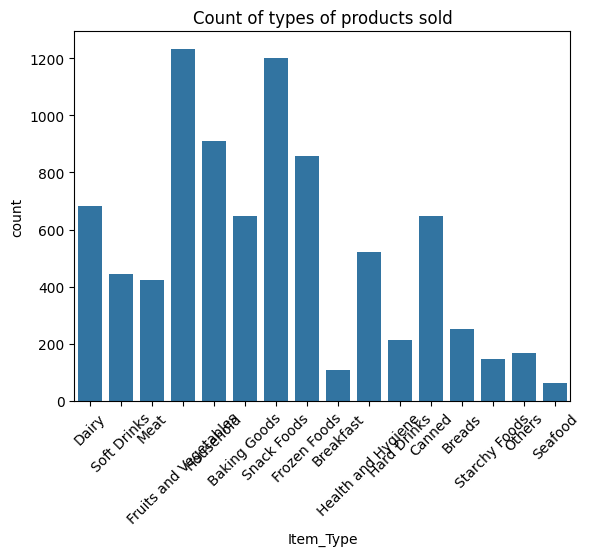

In [31]:
# Make a countplot for Item type
ax = sns.countplot(data=df, x='Item_Type')
ax.tick_params(axis='x', rotation = 45)
ax.set_title("Count of types of products sold");


Fruits and Vegetables have the highest sales while Seafood have the lowest sales.

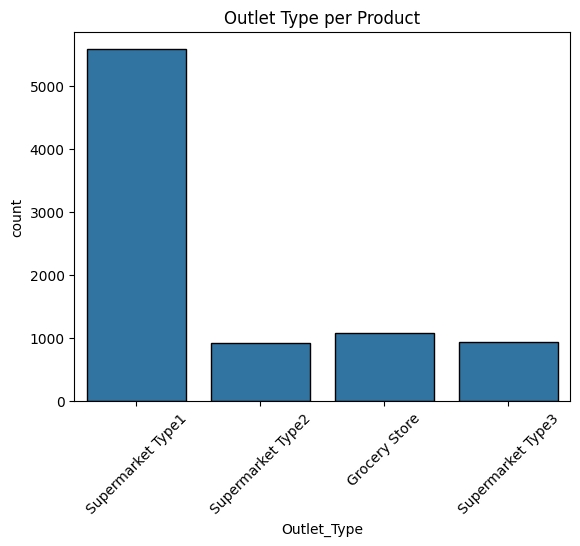

In [29]:
# Make a countplot for region
ax = sns.countplot(data=df, x='Outlet_Type', edgecolor='black')
ax.tick_params(axis='x', rotation = 45)
ax.set_title("Outlet Type per Product");

Outlets of Supermarkets Type 1 have most stock of products while Supermarkets Type 2 have the least stock of products.

### Multivariate Exploratory Visualizations

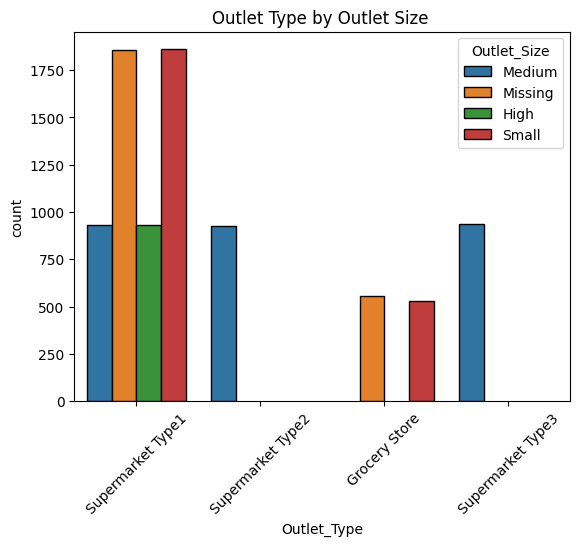

In [30]:
# Make a countplot for outlet type with hue as Outlet size
ax = sns.countplot(data=df, x='Outlet_Type', hue="Outlet_Size", edgecolor='black')
ax.tick_params(axis='x', rotation = 45)
ax.set_title("Outlet Type by Outlet Size ");

Supermarket Type 1 has all the outlet sizes while Supermarket Type 2 and Type 3 are mostly medium sized and the Grocery Stores are mostly small.

**Using histograms and boxplots to visualise numeric features.**

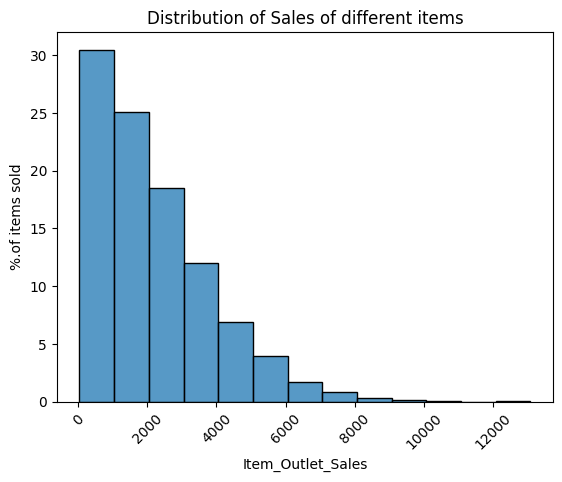

In [43]:
# Use seaborn's histplot function for Sales column
ax = sns.histplot(data=df, x="Item_Outlet_Sales", binwidth = 1000, stat='percent')
ax.set_title('Distribution of Sales of different items')
ax.set_ylabel('%.of items sold')
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);

30% of the items have total sales of 1000.

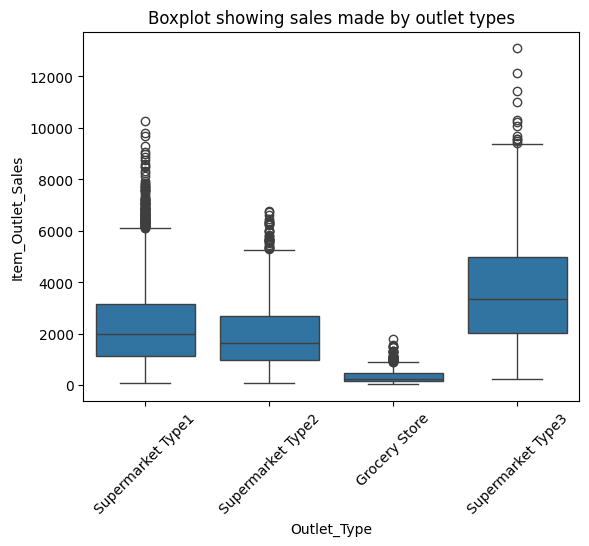

In [37]:
# Create a boxplot of sales against outlet type
ax = sns.boxplot(data=df, x='Outlet_Type', y= "Item_Outlet_Sales")
ax.tick_params(axis='x', rotation = 45)
ax.set_title("Boxplot showing sales made by outlet types");

Supermarket Type 3 have the highest total sales while Grocery Stores have the least sales which makes sense since it they are mostly small in size.

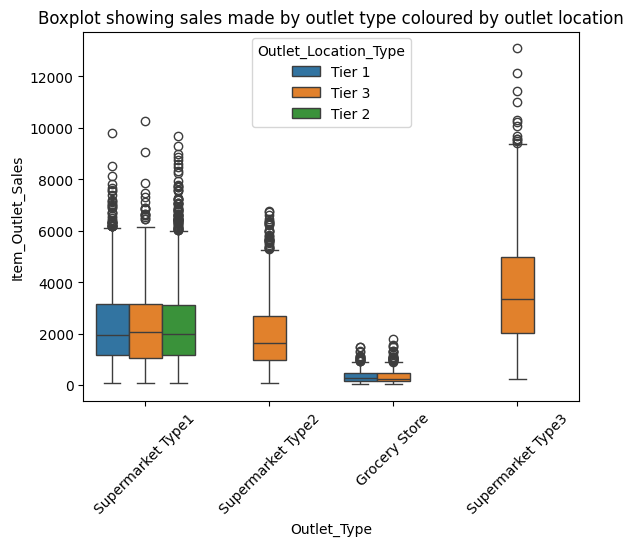

In [38]:
# Create a boxplot with additional variables for better comparisons
ax = sns.boxplot(data=df, x='Outlet_Type', y= "Item_Outlet_Sales",
                 hue="Outlet_Location_Type")
ax.tick_params(axis='x', rotation = 45)
ax.set_title("Boxplot showing sales made by outlet type coloured by outlet location");

Based on the boxplot,Tier 3 outlets seem to be the premuim locations. All Supermarket Type 3 are Tier 3 and made the most sales.

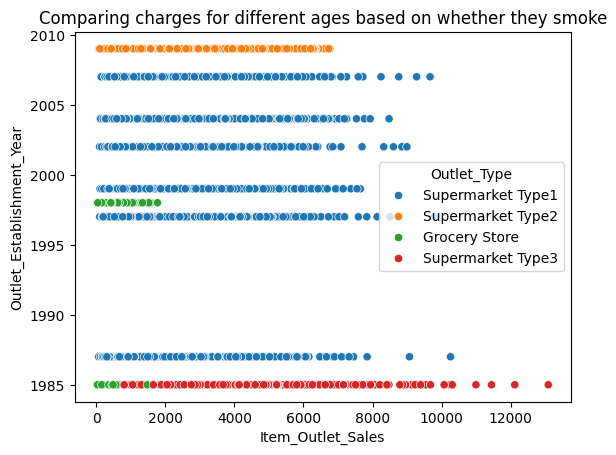

In [45]:
# Grouped scatterplot to visualize the relationship between sales and year of establishment, but colored by type
ax = sns.scatterplot(data=df, x="Outlet_Establishment_Year", y="Item_Outlet_Sales", hue="Outlet_Type");
ax.set_title("Comparing outlet sales by year of establishment and outlet type");

- No other Type 3 supermarkets have been opened since 1985 and these have the highest sales.
- Most of the stores are Type 1 supermarkets and they are the most commonly opened outlet type.
- Type 2 supermarkets where opened from the 2010s and made 8000 in sales.


**Comparing all numeric columns with a HeatMap**

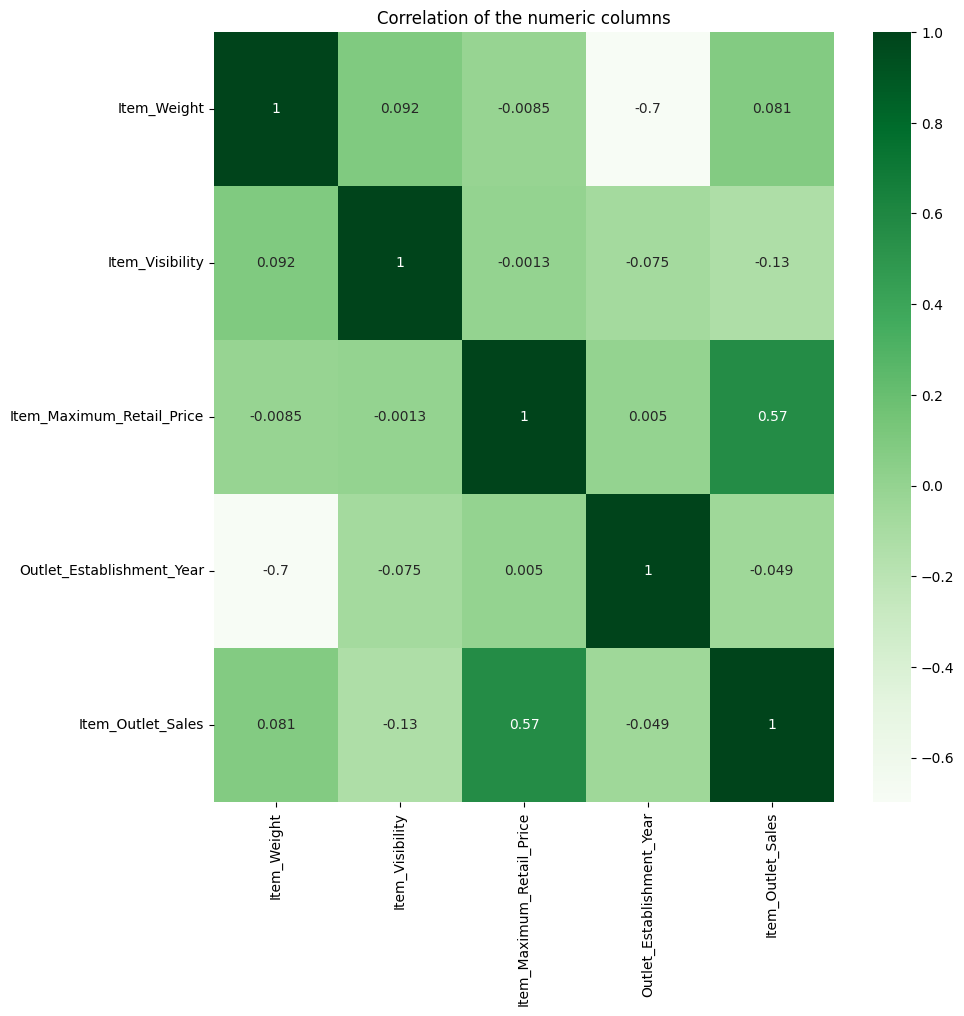

In [46]:
# Define a new varible to check correlations
corr = df.corr(numeric_only = True)
# Make heatmap to visualize correlations
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, cmap = 'Greens', annot = True, ax=ax)
ax.set_title("Correlation of the numeric columns");

Item_Outlet_Sales and Item_Maximum_Retail_Price have some positive correlation.

**Next looking closer at select variables with a regression model.**

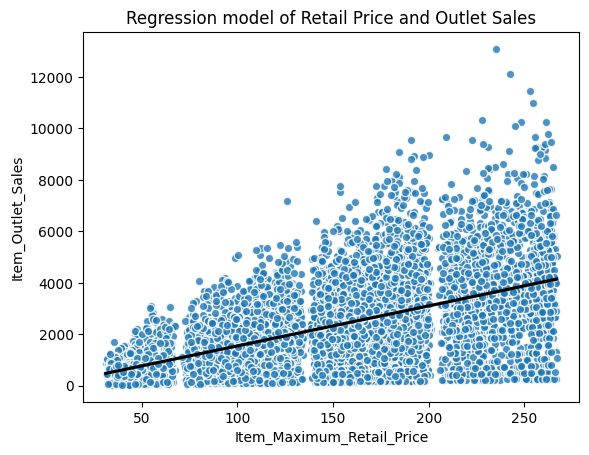

In [48]:
# Regression between Item_Maximum_Retail_Price and the Item_Outlet_Sales.
line_kws = dict(color='black')
scatter_kws = dict(edgecolor='white')
ax = sns.regplot(data=df, x ="Item_Maximum_Retail_Price", y ="Item_Outlet_Sales",
                 line_kws=line_kws, scatter_kws=scatter_kws)
ax.set_title("Regression model of Retail Price and Outlet Sales");

It is clear that the higher the maximum retail price of an item, the higher the outlet sales of the item.

## Feature Inspection